In [ ]:
!pip install torch
!pip install torchvision
!pip install seaborn

In [ ]:
!git clone https://github.com/ultralytics/yolov5

In [5]:
!copy license_plate_data.yaml "yolov5\\data\\"

        1 file(s) copied.


In [6]:
import torch
from IPython.display import Image  # for displaying images
import os 
import random
import shutil
from sklearn.model_selection import train_test_split
import xml.etree.ElementTree as ET
from xml.dom import minidom
from tqdm import tqdm
from PIL import Image, ImageDraw
import numpy as np
import matplotlib.pyplot as plt

random.seed(108)

C:\Users\megle\AppData\Roaming\Python\Python39\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [7]:
# Dictionary that maps class names to IDs
class_name_to_id_mapping = {"license_plate": 0}

In [ ]:
%load_ext tensorboard
%tensorboard --logdir runs/train/

In [9]:
!python yolov5/train.py --img 600 --cfg yolov5m.yaml --hyp hyp.scratch-med.yaml --batch 32 --epochs 100 --data license_plate_data.yaml --weights yolov5m.pt --workers 50 --name yolo_plate_det

Traceback (most recent call last):
  File "c:\projects\license_plate_recognition\yolov5\train.py", line 54, in <module>
    from utils.loggers import Loggers
  File "c:\projects\license_plate_recognition\yolov5\utils\loggers\__init__.py", line 12, in <module>
    from torch.utils.tensorboard import SummaryWriter
  File "c:\Python39\lib\site-packages\torch\utils\tensorboard\__init__.py", line 1, in <module>
    import tensorboard
ModuleNotFoundError: No module named 'tensorboard'


In [ ]:
!python detect.py --source ../images/test/ --weights runs/train/yolo_plate_det3/weights/best.pt --conf 0.5 --name yolo_plate_det3

detect: weights=['runs/train/yolo_plate_det3/weights/best.pt'], source=../images/test/, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.5, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=yolo_plate_det3, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v6.2-226-gfde7758 Python-3.7.15 torch-1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
YOLOv5s summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
image 1/267 /content/images/test/1005_3.jpg: 480x640 3 licenseplates, 12.3ms
image 2/267 /content/images/test/1036_2.jpg: 480x640 2 licenseplates, 10.1ms
image 3/267 /content/images/test/1049_1.jpg: 480x640 1 licenseplate, 10.1ms
image 4/267 /content/images/test/1052_2.jpg: 480x640 2 licenseplates, 10.1ms
image 5/267 /conte

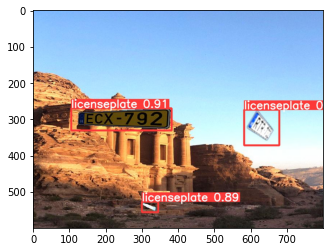

In [ ]:
detections_dir = "runs/detect/yolo_plate_det3/"
detection_images = [os.path.join(detections_dir, x) for x in os.listdir(detections_dir)]

random_detection_image = Image.open(random.choice(detection_images))
plt.imshow(np.array(random_detection_image))

In [ ]:
!python val.py --weights runs/train/yolo_plate_det3/weights/best.pt --data license_plate_data.yaml --task test --name yolo_det

val: data=/content/yolov5/data/license_plate_data.yaml, weights=['runs/train/yolo_plate_det3/weights/best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.6, max_det=300, task=test, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=yolo_det, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v6.2-226-gfde7758 Python-3.7.15 torch-1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
YOLOv5s summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
test: Scanning '/content/labels/test' images and labels...267 found, 0 missing, 0 empty, 0 corrupt: 100% 267/267 [00:00<00:00, 1356.54it/s]
test: New cache created: /content/labels/test.cache
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100% 9/9 [00:06<00:00,  1.30it/s]
                   all        267        521      0.984      0.946      0.975       0.85
Speed: 0.2m

In [ ]:
!python detect.py --source ../YCB-810.jpg --weights runs/train/yolo_plate_det3/weights/best.pt --conf 0.2 --name yolo_plate_det3

detect: weights=['runs/train/yolo_plate_det3/weights/best.pt'], source=../YCB-810.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.2, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=yolo_plate_det3, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v6.2-226-gfde7758 Python-3.7.15 torch-1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
YOLOv5s summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 /content/YCB-810.jpg: 480x640 (no detections), 12.2ms
Speed: 0.5ms pre-process, 12.2ms inference, 0.5ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/yolo_plate_det311


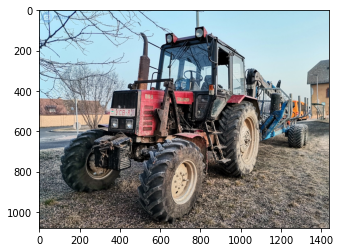

In [ ]:
detection_images = "runs/detect/yolo_plate_det311/YCB-810.jpg"

random_detection_image = Image.open(detection_images)
plt.imshow(np.array(random_detection_image))